In [142]:
import pandas as pd
import numpy as np

In [143]:
data = pd.read_csv('football_cleaned.csv')

In [144]:
headers = [
    "height",
    "age",
    "appearance",
    "goals",
    "assists",
    "yellow cards",
    "second yellow cards",
    "red cards",
    "goals conceded",
    "clean sheets",
    "minutes played",
    "days_injured",
    "games_injured",
    "award",
    "highest_value",
    "position_encoded",
    "winger",
    'highest_value',
    'current_value'
]

In [145]:
data = data[headers]

In [146]:
data.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger,highest_value,current_value
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,70000000,1,0,70000000,15000000
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,22000000,1,0,22000000,1500000
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,6000000,1,0,6000000,600000
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,2,0,50000000,50000000
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,80000000,2,0,80000000,40000000


In [147]:
data.shape

(10754, 19)

In [148]:
data.dtypes.value_counts()

int64      10
float64     9
Name: count, dtype: int64

In [149]:
data.describe() 

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger,highest_value,current_value
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,10754.000000,10754.000000,1.075400e+04,1.075400e+04
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,6.152606e+06,2.713223,0.307513,6.152606e+06,3.622971e+06
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,1.338988e+07,0.986356,0.461485,1.338988e+07,9.095410e+06
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,4.500000e+05,2.000000,0.000000,4.500000e+05,3.000000e+05
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,1.500000e+06,3.000000,0.000000,1.500000e+06,8.000000e+05
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,5.000000e+06,4.000000,1.000000,5.000000e+06,3.000000e+06
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,2.000000e+08,4.000000,1.000000,2.000000e+08,1.800000e+08


In [161]:
data['injury_impact'] = np.where(data['games_injured'] != 0, 
                                data['days_injured'] / data['games_injured'], 
                                0)

In [162]:
data.dtypes.isna().value_counts()

False    20
Name: count, dtype: int64

In [163]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [164]:
X = data.drop('current_value', axis = 1)
Y = data[['current_value']].values


In [165]:
ss = StandardScaler()
pf = PolynomialFeatures(2)

X_pf = pf.fit_transform(X)
feature_names = pf.get_feature_names_out(X.columns)
X_scaled = ss.fit_transform(X_pf)

In [166]:
X_scaled.shape

(10754, 210)

In [167]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_scaled and Y are your input data
# X_scaled has shape (10754, 18)
# Y has shape (10754, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Initialize the results DataFrame
results = pd.DataFrame(columns=['Technique', 'Parameters', 'MSE', 'R2'])

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Different PCA versions
components = [50, 100, 150]

for n in components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    mse, r2 = evaluate_model(LinearRegression(), X_train_pca, X_test_pca, y_train, y_test)
    results = pd.concat([results, pd.DataFrame([{'Technique': 'PCA', 'Parameters': f'n_components={n}', 'MSE': mse, 'R2': r2}])], ignore_index=True)

print(results)



C:\Users\Administrator\AppData\Local\Temp\ipykernel_1744\107086909.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{'Technique': 'PCA', 'Parameters': f'n_components={n}', 'MSE': mse, 'R2': r2}])], ignore_index=True)


  Technique        Parameters           MSE        R2
0       PCA   n_components=50  2.067643e+13  0.771366
1       PCA  n_components=100  1.891738e+13  0.790817
2       PCA  n_components=150  1.077618e+13  0.880840


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1744\1765570646.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{'Technique': 'PCA', 'Parameters': f'n_components={n}', 'MSE': mse, 'R2': r2}])], ignore_index=True)


  Technique        Parameters           MSE        R2
0       PCA   n_components=50  2.074855e+13  0.770569
1       PCA  n_components=100  1.882578e+13  0.791830
2       PCA  n_components=150  1.077404e+13  0.880864


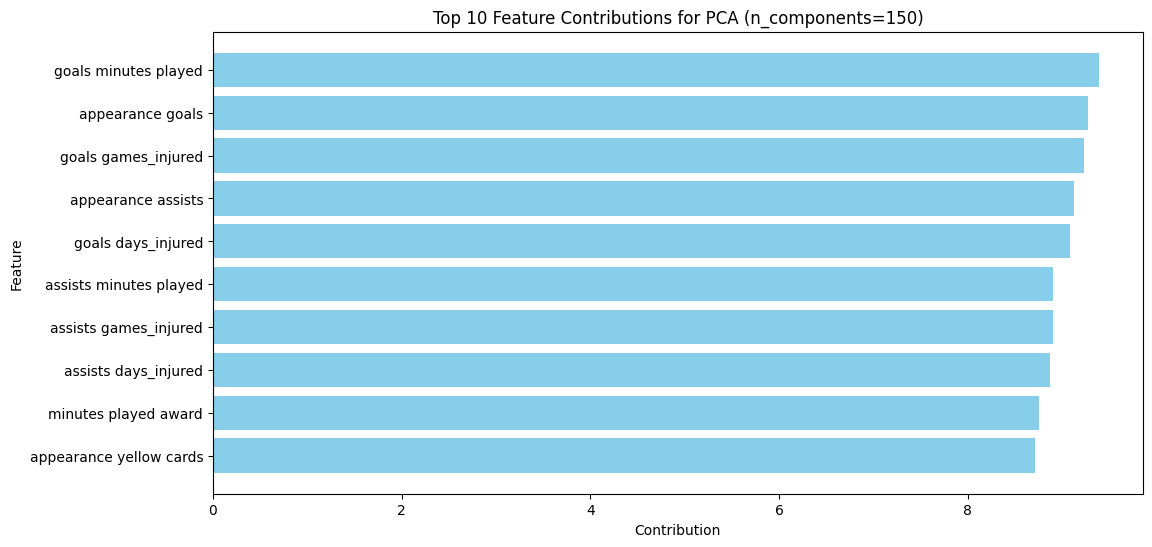

In [168]:


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Initialize the results DataFrame
results = pd.DataFrame(columns=['Technique', 'Parameters', 'MSE', 'R2'])

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Different PCA versions
components = [50, 100, 150]

best_pca = None
best_mse = float('inf')
best_r2 = float('-inf')
best_n_components = None

for n in components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    mse, r2 = evaluate_model(LinearRegression(), X_train_pca, X_test_pca, y_train, y_test)
    results = pd.concat([results, pd.DataFrame([{'Technique': 'PCA', 'Parameters': f'n_components={n}', 'MSE': mse, 'R2': r2}])], ignore_index=True)
    
    # Track the best PCA configuration
    if mse < best_mse:
        best_mse = mse
        best_r2 = r2
        best_pca = pca
        best_n_components = n

print(results)

# Plotting the main contributors for the best PCA configuration
if best_pca is not None:
    # Get the principal components
    principal_components = best_pca.components_
    
    # Sum of absolute values of component loadings for each feature
    feature_contributions = np.sum(np.abs(principal_components), axis=0)
    
    # Get the indices of the top contributing features
    top_features_idx = np.argsort(feature_contributions)[::-1][:10]
    
    # Get the names of the top contributing features
    top_features = [feature_names[i] for i in top_features_idx]
    
    # Get the contributions of the top features
    top_contributions = feature_contributions[top_features_idx]
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.barh(top_features, top_contributions, color='skyblue')
    plt.xlabel('Contribution')
    plt.ylabel('Feature')
    plt.title(f'Top 10 Feature Contributions for PCA (n_components={best_n_components})')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("No PCA configuration found.")


In [169]:
print("Top 10 Contributing Features:")
for feature, contribution in zip(top_features, top_contributions):
    print(f"{feature}: {contribution}")


Top 10 Contributing Features:
goals minutes played: 9.384890520229924
appearance goals: 9.276832485063089
goals games_injured: 9.229388392870284
appearance assists: 9.125948541001609
goals days_injured: 9.084184758136471
assists minutes played: 8.906808401611308
assists games_injured: 8.901119109455195
assists days_injured: 8.870593809883712
minutes played award: 8.751576504344143
appearance yellow cards: 8.71339366684542
